New Data from Happieness Report 2024  

We want to predict with our model the life ladder for 2023, therefore we need all Data for 2023

In [39]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("../data/world-happiness-report-2024.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   life_ladder                       2363 non-null   float64
 3   log_gdp_per_capita                2335 non-null   float64
 4   social_support                    2350 non-null   float64
 5   healthy_life_expectancy_at_birth  2300 non-null   float64
 6   freedom_to_make_life_choices      2327 non-null   float64
 7   generosity                        2282 non-null   float64
 8   perceptions_of_corruption         2238 non-null   float64
 9   positive_affect                   2339 non-null   float64
 10  negative_affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [42]:
df_2023 = df.query('year == 2023')
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      138 non-null    object 
 1   year                              138 non-null    int64  
 2   life_ladder                       138 non-null    float64
 3   log_gdp_per_capita                129 non-null    float64
 4   social_support                    138 non-null    float64
 5   healthy_life_expectancy_at_birth  135 non-null    float64
 6   freedom_to_make_life_choices      136 non-null    float64
 7   generosity                        129 non-null    float64
 8   perceptions_of_corruption         131 non-null    float64
 9   positive_affect                   138 non-null    float64
 10  negative_affect                   138 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 12.9+ KB


In [43]:
df_2023.drop(['generosity','negative_affect'], axis= 'columns', inplace= True)
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      138 non-null    object 
 1   year                              138 non-null    int64  
 2   life_ladder                       138 non-null    float64
 3   log_gdp_per_capita                129 non-null    float64
 4   social_support                    138 non-null    float64
 5   healthy_life_expectancy_at_birth  135 non-null    float64
 6   freedom_to_make_life_choices      136 non-null    float64
 7   perceptions_of_corruption         131 non-null    float64
 8   positive_affect                   138 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ KB


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_43355/4120316150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.drop(['generosity','negative_affect'], axis= 'columns', inplace= True)


In [58]:
df_mys= pd.read_csv('../data/mys_mean.txt')
df_mys.tail()

,country_name,mys_year
152,Vietnam,8.002617
153,Yemen,2.727503
154,Zambia,6.647242
155,Zimbabwe,8.118752
156,Kosovo,13.200000


In [52]:
country_names_lst = df.country_name.unique().tolist()
len(country_names_lst)

165

mys_2023 = []
count = 0
for item in country_names_lst:
    mys_2023.append({'country_name': item,
                     'mys_2023': df[df['country_name'] == item].head(2).mys_year.mean()})
                
    count += 1

df_mys_2023 = pd.DataFrame(mys_2023)

In [53]:
#quality_countries = df_mys_2023.country_name.unique()
#happy_countries = df_2023.country_name.unique()

#no_intersect = 
np.setxor1d(df_mys.country_name.unique(), df_2023.country_name.unique())
#no_intersect

array(['Algeria', 'Angola', 'Belarus', 'Belize', 'Bhutan', 'Burundi',
       'Central African Republic', 'China', 'Djibouti', 'Eswatini',
       'Guyana', 'Haiti', 'Jamaica', 'Lesotho', 'Qatar', 'Rwanda',
       'Somalia', 'Sudan', 'Suriname', 'Syria', 'Trinidad and Tobago'],
      dtype=object)

In [59]:
df_combine = pd.merge(df_2023, df_mys, on=['country_name'], how='left')
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      138 non-null    object 
 1   year                              138 non-null    int64  
 2   life_ladder                       138 non-null    float64
 3   log_gdp_per_capita                129 non-null    float64
 4   social_support                    138 non-null    float64
 5   healthy_life_expectancy_at_birth  135 non-null    float64
 6   freedom_to_make_life_choices      136 non-null    float64
 7   perceptions_of_corruption         131 non-null    float64
 8   positive_affect                   138 non-null    float64
 9   mys_year                          134 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.9+ KB


In [63]:
df_combine.dropna(inplace=True)
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 137
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      118 non-null    object 
 1   year                              118 non-null    int64  
 2   life_ladder                       118 non-null    float64
 3   log_gdp_per_capita                118 non-null    float64
 4   social_support                    118 non-null    float64
 5   healthy_life_expectancy_at_birth  118 non-null    float64
 6   freedom_to_make_life_choices      118 non-null    float64
 7   perceptions_of_corruption         118 non-null    float64
 8   positive_affect                   118 non-null    float64
 9   mys_year                          118 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.1+ KB


In [64]:
df_combine.to_csv('../data/life_ladder_2023.txt', index=False)

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_43355/1350002492.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['0','2','4','6','8','10'])
/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_43355/1350002492.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['0','20','40','60','80','100'])


[Text(0, 3.0, '0'),
 Text(0, 4.0, '20'),
 Text(0, 5.0, '40'),
 Text(0, 6.0, '60'),
 Text(0, 7.0, '80'),
 Text(0, 8.0, '100')]

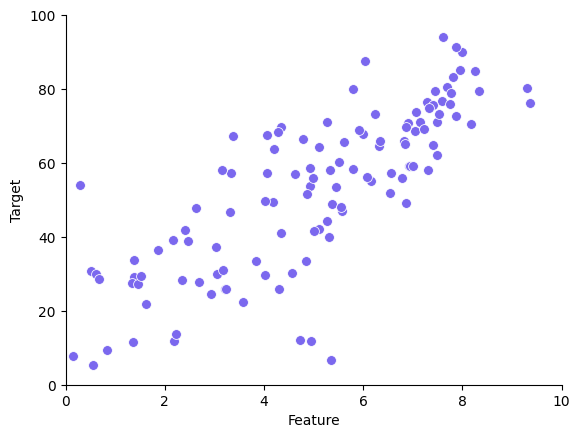

In [65]:
g=sns.scatterplot(data=df_combine,
                x='log_gdp_per_capita',
                y='life_ladder',
                color= 'mediumslateblue',
                s=50)
for edge in ['right', 'top']:
    g.spines[edge].set_visible(False)
g.set(ylabel='Target')
g.set(xlabel='Feature')
g.set_xlim(7, 12)
g.set_ylim(3, 8)
g.set_xticklabels(['0','2','4','6','8','10'])
g.set_yticklabels(['0','20','40','60','80','100'])